# Data Exploration


Data Details:

__Event__: contains web traffic data<br>
__Linkid__: from differents pages over a period of 7 days<br>
__Isrc__: page's content



In [244]:
#import libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [245]:
#load the dataset

df=pd.read_csv('/Users/cynthinawang/Desktop/website traffic analysis/web_traffic.csv')

In [246]:
#(number of rows, number of columns)

df.shape

(226278, 9)

In [247]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [248]:
# Add one column to get an idea of which day of the date
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

In [249]:
#null value quantity in each column

df.isnull().sum()

event             0
date              0
country          11
city             11
artist           37
album             5
track             5
isrc           7121
linkid            0
day_of_week       0
dtype: int64

# Part 1: 
__How many total pageview events did the links in the provided dataset receive in the full period, how many per day?__

In [250]:
#show the overall performance by 3 different events: pageview, click,preview

df['event'].value_counts()

pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

In [251]:
df[df['event']=='pageview'].groupby(by='date')['event'].count()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

Please note that we alloow for duplicates exist, meaning if the same user views the same page multiple times, we still count each time. 

# Part 2: 
__What about the other recorded events?__

In [252]:
#find out the other recored events

recorded_events=list(df['event'].unique())
recorded_events.remove('pageview')
print('The other recorded events:',recorded_events)

The other recorded events: ['click', 'preview']


In [253]:
# create a loop to apply the same function from Part 1

for recorded_event in recorded_events: 
    total_events = df[df['event'] == recorded_event].shape[0]
    print('Total number of', recorded_event, 'events is', total_events, '\n')
    occurance = df[df['event'] == recorded_event].groupby(by='date')['event'].count()
    print(recorded_event, 'event distribution per day:\n')
    print(occurance, '\n')

Total number of click events is 55732 

click event distribution per day:

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64 

Total number of preview events is 28531 

preview event distribution per day:

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64 



# Part 3: 
__Which countries did the clicks come from?__

In [254]:
# clicks by all countries

click_country=df[df['event']=='click'].groupby(by='country').size().reset_index(name='click_times')
click_country

,country,click_times
0,Albania,76
1,Algeria,129
2,American Samoa,1
3,Angola,36
4,Anguilla,2
...,...,...
197,Wallis and Futuna,1
198,Yemen,16
199,Zambia,38
200,Zimbabwe,5


In [255]:
#Top 5 countries with more clicks

top_5=click_country.sort_values(by='click_times',ascending=False).set_index('country').nlargest(5, 'click_times')
top_5

,click_times
country,
India,11609
United States,9533
Saudi Arabia,9495
France,4054
Iraq,1836


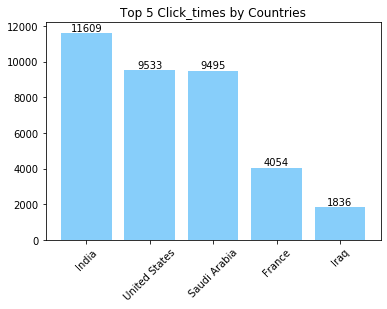

In [256]:
# Adding value labels to the bars

for i, value in enumerate(top_5['click_times']):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Virtualize the top 5 in bar chart

plt.bar(top_5.index,top_5['click_times'],color='lightskyblue')
plt.xticks(rotation=45)
plt.title('Top 5 Click_times by Countries')
plt.show()

# Part 4: 
__What was the overall click rate (clicks/pageviews) by link and by the day of the week?__

In [257]:
# filter only 'click' events and group them by the 'linkid' to get their count
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index().rename(columns={'event':'clicks'})
link_clicks.head()

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [258]:
# filter only 'pageview' events and group them by the 'linkid' to get their count
pageviews = df[df["event"] == "pageview"].groupby(by="linkid")["event"].count().reset_index().rename(columns={'event':'pageviews'})
pageviews.head()

,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


In [259]:
#Merge these two tables based on the same linkid level to get the click rate by divide the number of clicks by the number of pageviews

click_rate_table=pd.merge(left=link_clicks, right=pageviews, on="linkid", how="inner")
click_rate_table['click_rate']=(click_rate_table['clicks']/click_rate_table['pageviews']).round(2)
click_rate_table.sort_values(by='click_rate',ascending=False)

,linkid,clicks,pageviews,click_rate
1789,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,923,10,92.30
470,330773a6-f22a-5c7a-a3e4-7809fe8539b9,3,1,3.00
371,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7,3,1,3.00
1739,c2d99bb2-6ea3-568c-80d3-44dc36250cbc,2,1,2.00
172,132c744a-d87b-5ed6-aff2-d9b8c718a4ea,2,1,2.00
...,...,...,...,...
827,5a5e88cd-fae9-4383-8b78-bf7f4e4f5fbd,1,8,0.12
1009,6e6c1939-9d37-450e-aec1-2af09140bc33,1,11,0.09
324,229f278b-f052-57e7-813d-15d25f226723,1,11,0.09
1238,899f223b-55f0-5f5a-8351-3ea64d0ce29f,1,11,0.09


In [260]:
#Top 10 best performance click_rate link
top_10=click_rate_table.sort_values(by='click_rate',ascending=False).nlargest(10, 'click_rate')
top_10

,linkid,clicks,pageviews,click_rate
1789,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,923,10,92.3
470,330773a6-f22a-5c7a-a3e4-7809fe8539b9,3,1,3.0
371,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7,3,1,3.0
1739,c2d99bb2-6ea3-568c-80d3-44dc36250cbc,2,1,2.0
172,132c744a-d87b-5ed6-aff2-d9b8c718a4ea,2,1,2.0
2189,f8995840-5284-5961-b9dd-b7b34c437476,2,1,2.0
571,3e7fb196-61dc-4d8e-b296-925e9c9c778e,2,1,2.0
2054,e82e2452-dc28-5799-be34-1b4fdd82f0a6,2,1,2.0
1890,d4a21b72-aeee-5e11-a1a6-8928ec8bebdc,2,1,2.0
863,5e6c612c-0672-4b78-8a3a-11c1e2dcaf43,2,1,2.0


In [261]:
#By date

link_clicks_d= df[df["event"] == "click"].groupby(by="day_of_week")["event"].count().reset_index().rename(columns={'event':'clicks'})
pageviews_d = df[df["event"] == "pageview"].groupby(by="day_of_week")["event"].count().reset_index().rename(columns={'event':'pageviews'})

In [297]:
#Merge these two tables based on the same day_of_week to get the click rate by divide the number of clicks by the number of pageviews

click_rate_d_table=pd.merge(left=link_clicks_d, right=pageviews_d, on="day_of_week", how="inner")
click_rate_d_table['click_rate']=(click_rate_d_table['clicks']/click_rate_d_table['pageviews']).round(2)
click_rate_d_table.sort_values(by='click_rate',ascending=False)

,day_of_week,clicks,pageviews,click_rate
4,Thursday,9207,22366,0.41
0,Friday,8508,21382,0.40
1,Monday,7315,18646,0.39
5,Tuesday,7301,18693,0.39
6,Wednesday,7476,19149,0.39
2,Saturday,8071,21349,0.38
3,Sunday,7854,20430,0.38


Users take more time to search the website during Thursday and Friday, while lease time during weekend. 

# Part 5: 
__How does the clickrate distribute across different links?__

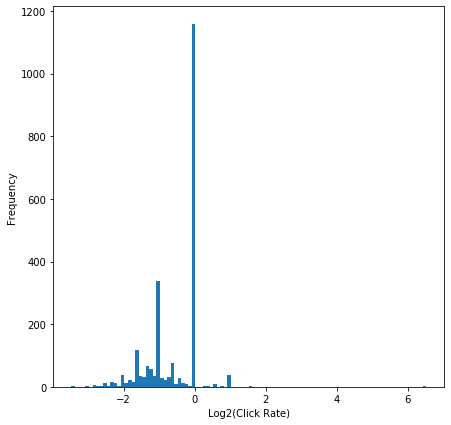

In [322]:
click_rate["click_rate_log2"] = np.log2(click_rate_table["click_rate"])
br = click_rate["click_rate_log2"].plot(kind="hist", figsize=(7, 7), bins=100)
_ = br.set_xlabel("Log2(Click Rate)")

we can see many links that have been viewed and clicked once,and many links that have been viewed many times but clicked on fewer, since values less than 0. 

# Part 6: 
__Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect?__

In [314]:
# filter only events that are relevant to the question

df_q6 = df[df["event"].isin(["click", "preview"])]

In [315]:
df_q6

,event,date,country,city,artist,album,track,isrc,linkid,day_of_week
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,Saturday
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,Saturday
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday
...,...,...,...,...,...,...,...,...,...,...
94585,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Monday
94586,preview,2021-08-23,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life,USWU30200093,0ea9f8bf-a144-42bd-a7b0-124e73914da4,Monday
94587,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,Monday
94588,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,Monday


In [316]:
# filter only 'click' events and group them by the 'linkid' to get their count,
link_clicks = df[df["event"] == "click"].groupby(by="linkid")["event"].count().reset_index()
link_clicks = link_clicks.rename(columns={"event": "clicks"})

# do the same for the 'preview' events

previews = df[df["event"] == "preview"].groupby(by="linkid")["event"].count().reset_index()
previews = previews.rename(columns={"event": "previews"})

In [317]:
df_q6 = pd.merge(left=df_q6, right=link_clicks, how="left", on="linkid")
df_q6 = pd.merge(left=df_q6, right=previews, how="left", on="linkid")
df_q6

,event,date,country,city,artist,album,track,isrc,linkid,day_of_week,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,Saturday,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,Saturday,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday,9692.0,5974.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84258,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Monday,9692.0,5974.0
84259,preview,2021-08-23,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life,USWU30200093,0ea9f8bf-a144-42bd-a7b0-124e73914da4,Monday,20.0,14.0
84260,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,Monday,235.0,145.0
84261,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,Monday,2109.0,1605.0


In [319]:
df_q6.dropna(subset=['clicks','previews'], inplace=True)
df_q6

,event,date,country,city,artist,album,track,isrc,linkid,day_of_week,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,Saturday,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,Saturday,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Saturday,9692.0,5974.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84258,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,Monday,9692.0,5974.0
84259,preview,2021-08-23,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life,USWU30200093,0ea9f8bf-a144-42bd-a7b0-124e73914da4,Monday,20.0,14.0
84260,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,Monday,235.0,145.0
84261,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,Monday,2109.0,1605.0


In [320]:
df_q6.corr()

,clicks,previews
clicks,1.000000,0.998713
previews,0.998713,1.000000


Almost perfectly postitive correlation between the number of clicks and previews which seems logical.